## I. Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---

## II. Thu thập dữ liệu

Ta sử dụng tập dữ thu thập sẵn là file "bank.csv" đính kèm theo. Đây là dữ liệu về kết quả của chiến dịch maketing từ một ngân hàng, được đưa lên trang kaggle.com và đường dẫn [tại đây](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)

---

## Đọc dữ liệu

In [3]:
df = pd.read_csv('./bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


---

## III. Khám phá dữ liệu

### Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [5]:
df.shape

(11162, 17)

- Vậy dữ liệu có kích thước **11162 dòng x 17 cột**
- Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp của một tổ chức ngân hàng Bồ Đào Nha. Các chiến dịch tiếp thị dựa trên các cuộc gọi điện thoại. Thông thường, cần có nhiều liên hệ với cùng một khách hàng, để biết xem khách hàng có gửi tiền kỳ hạn ngân hàng hay không.

### Dữ liệu có bị lặp không?

In [6]:
df.duplicated().sum()

0

- Vậy dữ liệu của ta không bị lặp

### Dữ liệu có bị thiếu không?

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

- Theo như trên ta thấy dữ liệu không hề bị thiếu, nhưng ở bước đọc dữ liệu ta nhận thấy một vài cột có giá trị `unknown`, vậy có nghĩa là dữ liệu trong file đã thây những giá trị thiếu thành `unknown` vậy ta sẽ làm ngược lại để kiểm tra.
- Xử lý dữ liệu `unknown` và kiểm tra lại.

In [8]:
df.replace('unknown',np.nan,inplace=True)
df.isna().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

- Hừm có vẻ lần này ta đã phát hiện ra những cột dữ liệu bị thiếu.
- Cột dữ liệu bị thiếu là **education**, **contact** và **poutcome**

### Thông tin về các cột dữ liệu như sau

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

* **age**: độ tuổi
* **job**: loại công việc
* **marital**: tình trạng hôn nhân
* **education**: trình độ học vấn
* **default**: có nợ xấu không
* **balance**: số dư cá nhân
* **housing**: có khoản nợ vay mua nhà không?
* **loan**: có khoản vay cá nhân không
* **contact**: cách thức liên lạc
* **day**: ngày trong tuần liên lạc gần nhất
* **month**: tháng liên lạc gần đây nhất
* **duration**: thời lượng liên hệ gần nhất, tính bằng giây
* **campaign**: số lượng địa chỉ liên hệ được thực hiện trong chiến dịch này và cho khách hàng này (số, bao gồm cả địa chỉ liên hệ cuối cùng)
* **pdays**: số ngày trôi qua sau chiến dịch khi khách hàng liên lạc
* **previous**: số lượng địa chỉ liên hệ được thực hiện trước chiến dịch này và cho khách hàng này
* **poutcome**: kết quả tiếp thị trước đó với khách hàng này
* **deposit**: khách hàng có đăng ký gửi tiền không


### Kiểu dữ liệu ở từng cột như thế nào?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11092 non-null  object
 2   marital    11162 non-null  object
 3   education  10665 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    8816 non-null   object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   2836 non-null   object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- Dữ liệu đã phù hợp, các cột cần là dữ số cũng đã được đặt đúng

### Phân bố của dữ liệu số như thế nào?

In [11]:
numeric_cols = df.select_dtypes(include=['int64'])
nume_col_profiles_df = numeric_cols.agg([ lambda co: co.isnull().sum()*100/len(co),
                            'min',
                            'max'])
nume_col_profiles_df.rename(index={'<lambda>':'missing_ratio'},inplace=True)
nume_col_profiles_df

,age,balance,day,duration,campaign,pdays,previous
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,18.0,-6847.0,1.0,2.0,1.0,-1.0,0.0
max,95.0,81204.0,31.0,3881.0,63.0,854.0,58.0


- Hãy cùng nhau nhìn phân bổ dữ liệu thông qua biểu đồ trực quan

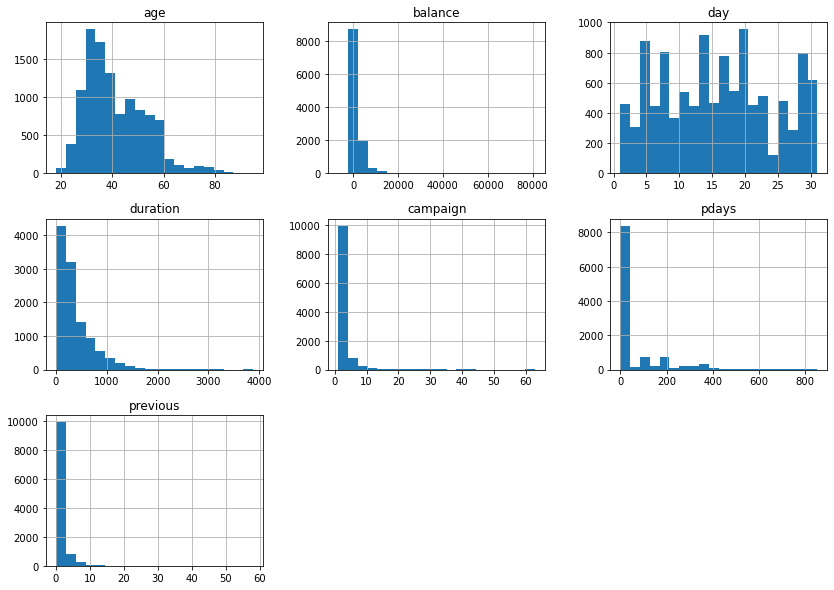

In [12]:
df.hist(bins=20, figsize=(14,10))
plt.show()

### Các cột dữ liệu categorical phân bố như thế nào?

In [13]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
cate_cols = df[cat_columns]
cate_col_profiles_df = cate_cols.agg([ lambda co: co.isnull().sum()*100/len(co),
                                        lambda co: len(co.dropna().unique()), 
                                        lambda co: co.dropna().unique()])
cate_col_profiles_df.index =['missing_ratio','num_diff_vals','diff_vals']
display(cate_col_profiles_df.T)

,missing_ratio,num_diff_vals,diff_vals
job,0.627128,11,"[admin., technician, services, management, ret..."
marital,0.0,3,"[married, single, divorced]"
education,4.452607,3,"[secondary, tertiary, primary]"
default,0.0,2,"[no, yes]"
housing,0.0,2,"[yes, no]"
loan,0.0,2,"[no, yes]"
contact,21.017739,2,"[cellular, telephone]"
month,0.0,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ..."
poutcome,74.592367,3,"[other, failure, success]"


- Hãy dùng biểu đồ để trực quan hóa rõ hơn về dữ liệu này

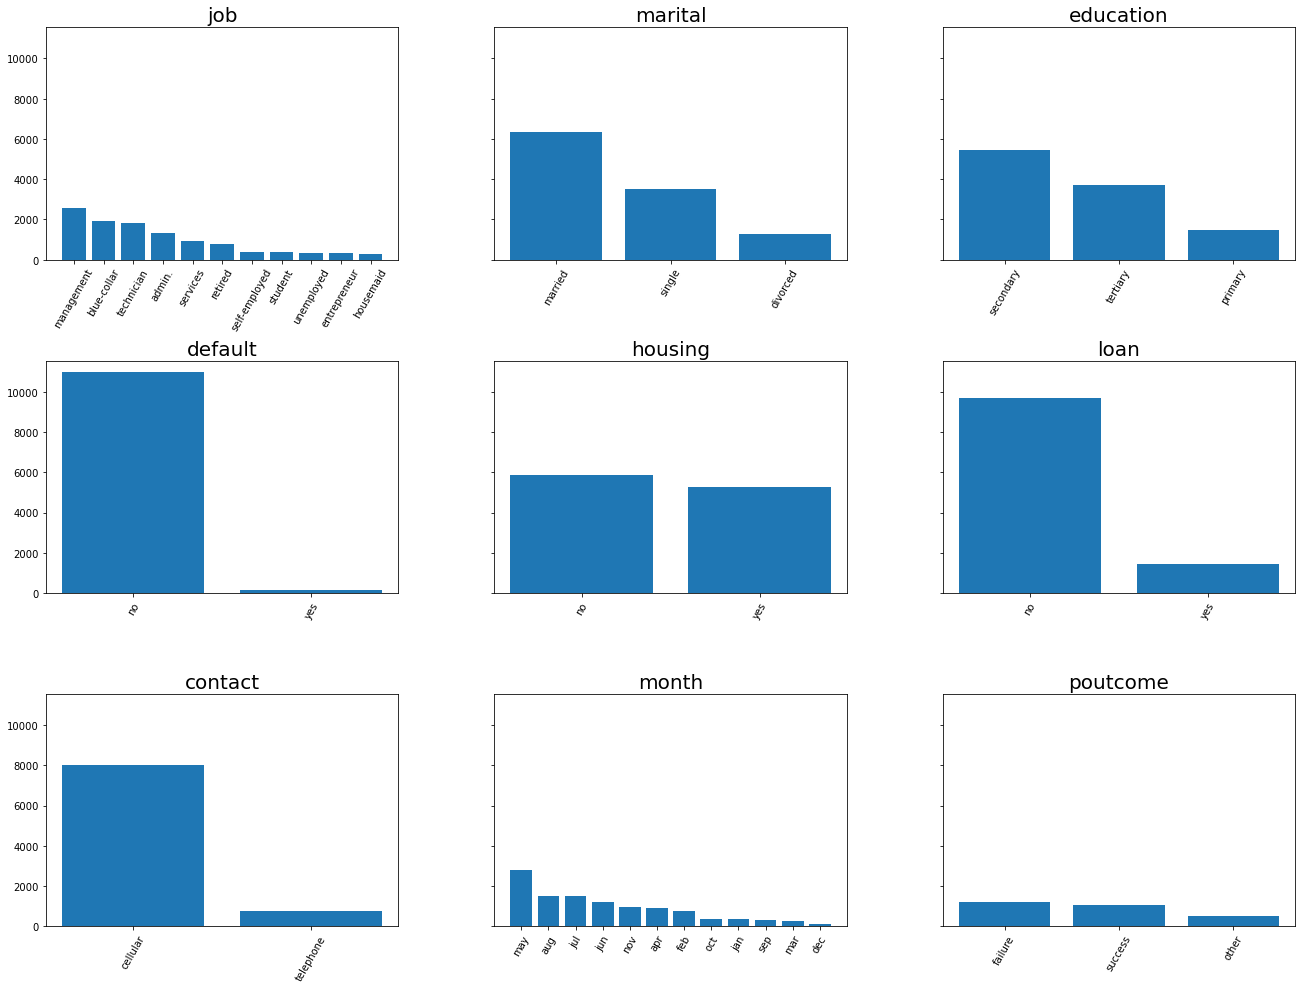

In [14]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=True, figsize=(20, 15))
fig.tight_layout(pad=8.0)

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column,fontsize=20)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(60)
    
    counter += 1

plt.show()

---

## IV. Đưa ra câu hỏi
Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
### 1. Quyết định gửi tiền kỳ hạn phụ thuộc vào yếu tố gì và  như thế nào?
   - Để trả lời câu hỏi này, hãy xem xét qua một số yếu tố sau:
       - Age
       - Job
       - Martital
       - Education
       - Default
       - Housing
       - Loan

#### 1.1 Độ tuổi ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?
- Ta sẽ xem những người đồng ý gửi kỳ hạn thường tập trung đổ tuổi nào, còn những người không đồng ý gửi kỳ hạn sẽ như thế nào

##### Tiến hành xử lý dữ liệu: 
- Trước tiên ta cần xử lý dữ liệu, chia độ tuổi thành các cụm khác nhau, theo quan sát thì độ tuổi nhỏ nhất là 18 và lớn nhất là 95. Vậy ta sẽ chia thành các cụm *18-30*, *30-60* và *60 trở lên*.

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

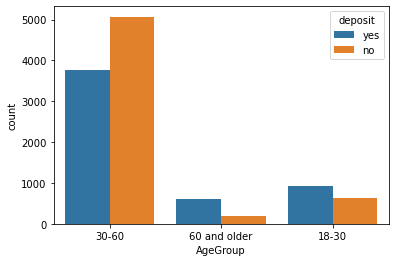

In [123]:
age_df = df[['age','deposit']]
age_df.loc[(age_df['age'] >= 18) & (age_df['age'] < 30), 'AgeGroup'] = '18-30'
age_df.loc[(age_df['age'] >= 30) & (age_df['age'] < 60),'AgeGroup'] = '30-60'
age_df.loc[age_df['age'] >= 60, 'AgeGroup'] = '60 and older'


sns.countplot( x='AgeGroup',hue='deposit',data=age_df[['deposit','AgeGroup']])

<AxesSubplot:xlabel='age'>

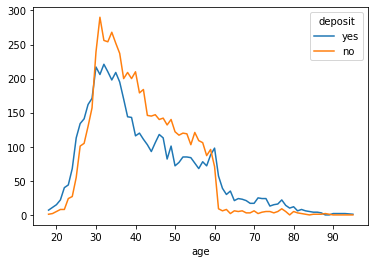

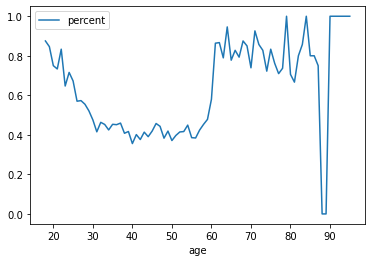

In [124]:
group_deposit_age_df = age_df[['deposit','age']].groupby(['deposit','age']).size().reset_index(name='count')

count_df = group_deposit_age_df.pivot_table('count','age','deposit')
count_df = count_df[['yes','no']]
count_df.replace(np.nan,0,inplace=True)

percent_df = pd.DataFrame()
percent_df['percent'] = pd.DataFrame(count_df['yes']/(count_df['no']+count_df['yes']))
count_df.plot.line()
percent_df.plot.line()

- **Nhận xét:**
    - Ta có thể thấy những người từ khoảng độ tuổi từ *nhỏ hơn 30* sẽ có xu hướng gửi kỳ hạn cao.
    - Và khi bước sang độ tuổi từ *30-60* đã có sử chuyển biến, tỷ lệ người gửi kỳ hạn đã giảm đi.
    - Và cuối cùng lại tăng lên ở độ tuổi *60 trở lên*
    - Từ quan sát trên ta có thể thấy chiến dịch marketing thường sẽ hiệu quả với những người trẻ (*nhỏ hơn 30*) hoặc những người lớn tuổi (*lớn hơn 60*), và dường như khi bước sang tuổi 30 người ta thường lưỡng lự khi gửi tiền kỳ hạn, điều này nhận thấy khi tỷ lệ giảm rõ, có thể ở độ tuổi này người ta thường sẽ dùng tiền để đầu tư để làm những việc khác hơn so với để tiền ở yên một chỗ. Vậy ta có thể thấy những đối tượng dễ tiếp cận trong chiến dịch marketing là từ khoảng *18-30* và *lớn hơn 60*.

#### 1.2 Nghề nghiệp ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

- Đầu tiên ta hãy xem phân bổ số người tham gia và số người đồng ý ở từng nghề nghiệp

<AxesSubplot:xlabel='job', ylabel='count'>

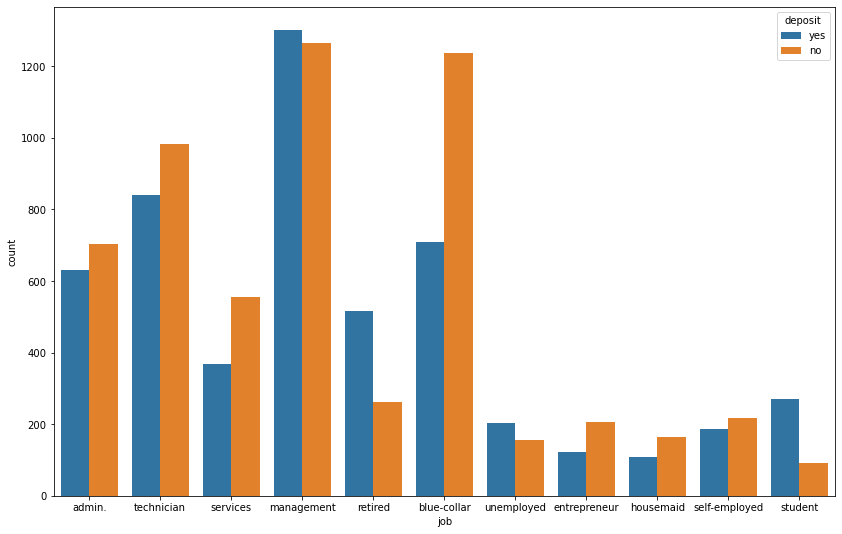

In [104]:
job_df = df[['job','deposit']]

fig, ax = plt.subplots(figsize=(14,9))
sns.countplot(ax=ax, x='job',hue='deposit',data=job_df)

<AxesSubplot:xlabel='Percent', ylabel='Job'>

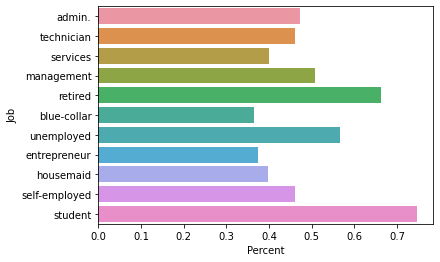

In [105]:
job_list = job_df['job'].unique()
job_percent_yes = dict()
for job in job_list:
    n_yes = job_df.loc[(job_df['job'] == job) & (job_df['deposit'] == 'yes')].shape[0]
    n = job_df.loc[(job_df['job'] == job)].shape[0]
    if n!=0:
        job_percent_yes[job] = n_yes/n

job_percent_yes = pd.DataFrame(job_percent_yes.items(), columns=['Job','Percent'])
sns.barplot(x='Percent',y='Job',data=job_percent_yes)

- Từ trên ta thấy được những đối tượng dễ tiếp cận là *Student, retired, unemployed* đều có điểm chung là hiện có khả năng cao là không đi làm và những đối tượng khó tiếp cận thường là *blue-collar, entrepreneur* những nghề nghiệp cần nhiều chi tiêu.

#### 1.3 Tình trạng hôn nhân ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

<AxesSubplot:xlabel='marital', ylabel='count'>

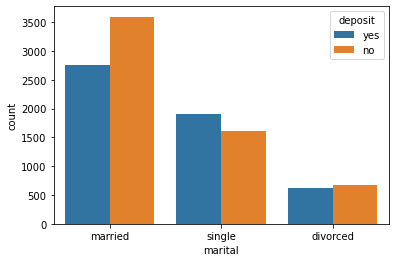

In [122]:
marital_df = df[['marital','deposit']]
marital_df.count()
sns.countplot(x='marital',hue='deposit',data=marital_df)

- Theo quan sát ta thấy, tỷ lệ người đã kết hôn thường sẽ không đồng ý gửi kỳ hạn, tỷ lệ người độc thân thì ngược lại sẽ đồng ý gửi kỳ hạn cao hơn, *50/50* ở những người đã li dị

#### 1.4 Mức độ giáo dục ảnh hưởng đến quyết định gửi tiền kỳ hạn như thế nào?

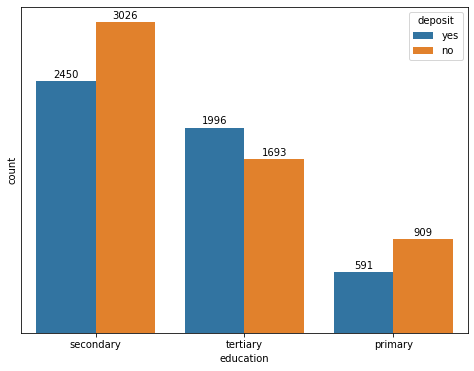

In [133]:
marital_df = df[['education','deposit']]

plt.figure(figsize=(8, 6))
g = sns.countplot(x= 'education', hue = 'deposit', data=marital_df)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()